# IN bagging there are 10k rows and lets suppose it is classfication problem now we will take multiple base model for eg 100 then we have to enusre the every model is same like if LR then LR only but in this we have to give a certain part of the data not every part.

# Bootstraping  is we take subset of the data and train the base model.

# We create differnt datasets and then we will provide it to the model  this is known as bootstrap

# Bagging use only 1 model but with the diffrent data sets while in the Voting ensemble there are diffrent models

# IN bagging algo we take model that have LOW BIAS AND HIGH VARIANCE eg(Decision tree(max_dept=none),SVM,KNN) now the maint thing is we have to reduce the variance

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
Le=LabelEncoder()

In [5]:
df['variety']=Le.fit_transform(df['variety'])

In [6]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
df=df[df['variety']!=0][['sepal.width','petal.length','variety']]

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

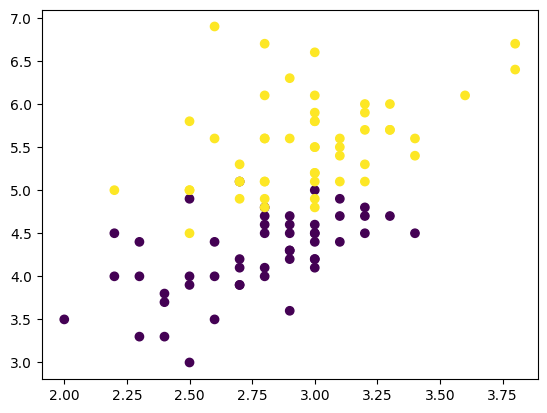

In [28]:
plt.scatter(df['sepal.width'],df['petal.length'],c=df['variety'])

In [30]:
df=df.sample(100)

In [42]:
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)


In [47]:
print(df_val)
print(df_test)
print(df_train)

     sepal.width  petal.length  variety
106          2.5           4.5        2
62           2.2           4.0        1
112          3.0           5.5        2
83           2.7           5.1        1
107          2.9           6.3        2
     sepal.width  petal.length  variety
138          3.0           4.8        2
143          3.2           5.9        2
86           3.1           4.7        1
94           2.7           4.2        1
127          3.0           4.9        2
     sepal.width  petal.length  variety
146          2.5           5.0        2
128          2.8           5.6        2
99           2.8           4.1        1
144          3.3           5.7        2
135          3.0           6.1        2
58           2.9           4.6        1
126          2.8           4.8        2
67           2.7           4.1        1
142          2.7           5.1        2
81           2.4           3.7        1


In [50]:
X_test=df_val.iloc[:,0:2].values
Y_test=df_val.iloc[:,-1].values

In [51]:
Y_test

array([2, 1, 2, 1, 2])

# CASE 1)Bagging

In [54]:
df_bag=df_train.sample(8,replace=True) 
X=df_bag.iloc[:,0:2]
Y=df_bag.iloc[:,-1]
df_bag

,sepal.width,petal.length,variety
99,2.8,4.1,1
81,2.4,3.7,1
135,3.0,6.1,2
135,3.0,6.1,2
67,2.7,4.1,1
142,2.7,5.1,2
144,3.3,5.7,2
142,2.7,5.1,2


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [65]:
dt_bag1=DecisionTreeClassifier()

In [69]:
def evaluate(clf,X,Y): 
    clf.fit(X,Y) 
    plot_tree(clf)
    plt.show() 
    plot_decision_regions(X.values,Y.values,clf=clf,legend=2)
    Y_pred=clf.predict(X_test)
    print("THe accuracy score is",accuracy_score(Y_pred,Y_test))

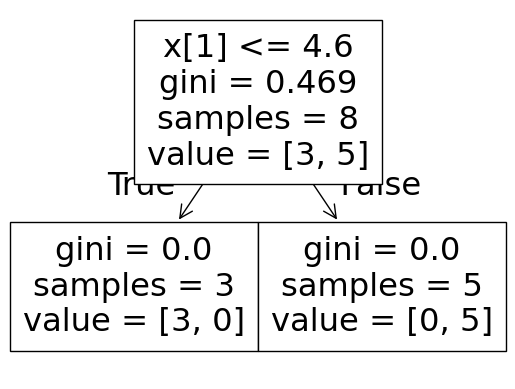

C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


THe accuracy score is 0.6


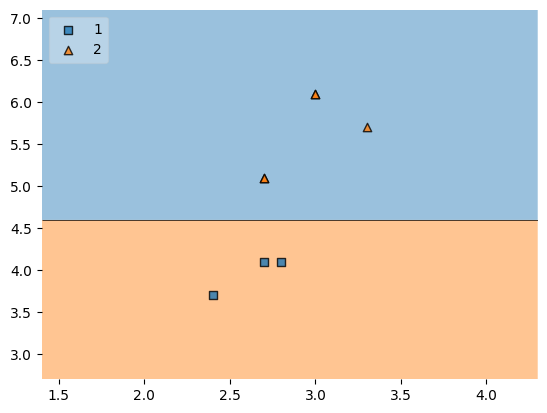

In [70]:
evaluate(dt_bag1,X,Y)

In [72]:
df_bag2=df_train.sample(8,replace=True) 
X=df_bag.iloc[:,0:2]
Y=df_bag.iloc[:,-1]
df_bag2

,sepal.width,petal.length,variety
144,3.3,5.7,2
58,2.9,4.6,1
142,2.7,5.1,2
67,2.7,4.1,1
99,2.8,4.1,1
146,2.5,5.0,2
81,2.4,3.7,1
144,3.3,5.7,2
